# Exploring Datasets

Dataset Source: [International migration flows to and from selected countries - The 2015 revision]
(http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, I will focus on the Australian immigration data.

In [17]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Get Australian Immigration data to df_aus variable
df_aus = pd.read_csv(r"C:\Users\pc\Documents\Data Analysis Portfolio Project\Australia Immigration\Australia data.csv")
df_aus.head()

,OdName,CODE,AreaName,RegName,DevName,1980,1981,1982,1983,1984,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,AFG,Asia,Southern Asia,Developing regions,10,20,30,30,70,...,270,100,20,40,70,80,110,180,140,560
1,Albania,ALB,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,70,110,110,200,250,140,130,110,110,140
2,Algeria,DZA,Africa,Northern Africa,Developing regions,10,50,30,10,20,...,30,20,30,60,20,20,50,30,30,60
3,American Samoa,ASM,Oceania,Polynesia,Developing regions,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,Andorra,AND,Europe,Southern Europe,Developed regions,0,0,10,0,0,...,10,0,10,10,0,10,10,0,10,10


In [19]:
# Get a short summary of the dataframe
df_aus.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Columns: 34 entries, OdName to 2008
dtypes: int64(29), object(5)
memory usage: 59.1+ KB


In [20]:
# Get the number of row and column
print("The number of rows is {} and columns is {}".format(df_aus.shape[0], df_aus.shape[1]))

The number of rows is 222 and columns is 34


In [21]:
# Remove a few unnecessary columns
df_aus.drop(['CODE', 'DevName'], inplace=True, axis=1)
df_aus.head()

,OdName,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,Asia,Southern Asia,10,20,30,30,70,100,110,...,270,100,20,40,70,80,110,180,140,560
1,Albania,Europe,Southern Europe,0,0,0,0,0,0,0,...,70,110,110,200,250,140,130,110,110,140
2,Algeria,Africa,Northern Africa,10,50,30,10,20,20,10,...,30,20,30,60,20,20,50,30,30,60
3,American Samoa,Oceania,Polynesia,0,0,0,0,0,20,0,...,0,0,0,0,0,0,0,0,0,10
4,Andorra,Europe,Southern Europe,0,0,10,0,0,0,10,...,10,0,10,10,0,10,10,0,10,10


In [22]:
# Rename some columns for easy understanding purpose
df_aus.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
df_aus.head()

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,Asia,Southern Asia,10,20,30,30,70,100,110,...,270,100,20,40,70,80,110,180,140,560
1,Albania,Europe,Southern Europe,0,0,0,0,0,0,0,...,70,110,110,200,250,140,130,110,110,140
2,Algeria,Africa,Northern Africa,10,50,30,10,20,20,10,...,30,20,30,60,20,20,50,30,30,60
3,American Samoa,Oceania,Polynesia,0,0,0,0,0,20,0,...,0,0,0,0,0,0,0,0,0,10
4,Andorra,Europe,Southern Europe,0,0,10,0,0,0,10,...,10,0,10,10,0,10,10,0,10,10


In [23]:
# Add the Total column to sum up the total immigrants for the years from 1980 to 2008
years = list(map(str, range(1980, 2009)))
df_aus['Total'] = df_aus[years].sum(axis=1)
df_aus.head()

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
0,Afghanistan,Asia,Southern Asia,10,20,30,30,70,100,110,...,100,20,40,70,80,110,180,140,560,4630
1,Albania,Europe,Southern Europe,0,0,0,0,0,0,0,...,110,110,200,250,140,130,110,110,140,1910
2,Algeria,Africa,Northern Africa,10,50,30,10,20,20,10,...,20,30,60,20,20,50,30,30,60,730
3,American Samoa,Oceania,Polynesia,0,0,0,0,0,20,0,...,0,0,0,0,0,0,0,0,10,30
4,Andorra,Europe,Southern Europe,0,0,10,0,0,0,10,...,0,10,10,0,10,10,0,10,10,100


In [24]:
# Check the null objects
df_isnull = df_aus.notnull()
for column in df_isnull.columns.to_list():
    print('column:')
    print(df_isnull[column].value_counts())
    print('')

column:
True    222
Name: Country, dtype: int64

column:
True    222
Name: Continent, dtype: int64

column:
True    222
Name: Region, dtype: int64

column:
True    222
Name: 1980, dtype: int64

column:
True    222
Name: 1981, dtype: int64

column:
True    222
Name: 1982, dtype: int64

column:
True    222
Name: 1983, dtype: int64

column:
True    222
Name: 1984, dtype: int64

column:
True    222
Name: 1985, dtype: int64

column:
True    222
Name: 1986, dtype: int64

column:
True    222
Name: 1987, dtype: int64

column:
True    222
Name: 1988, dtype: int64

column:
True    222
Name: 1989, dtype: int64

column:
True    222
Name: 1990, dtype: int64

column:
True    222
Name: 1991, dtype: int64

column:
True    222
Name: 1992, dtype: int64

column:
True    222
Name: 1993, dtype: int64

column:
True    222
Name: 1994, dtype: int64

column:
True    222
Name: 1995, dtype: int64

column:
True    222
Name: 1996, dtype: int64

column:
True    222
Name: 1997, dtype: int64

column:
True    222
Name

As we can see from the results above, all columns were already filled up

In [25]:
# View a quick summary of our dataframe
df_aus.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,2.220000e+02
mean,811.846847,938.063063,861.216216,677.252252,673.693694,756.486486,861.756757,968.918919,1114.864865,1048.153153,...,1405.675676,1582.522523,1620.855856,1741.846847,1573.603604,1629.144144,1801.306306,1992.522523,2391.891892,3.524077e+04
std,3945.623925,4703.923205,4093.321551,2703.258988,2456.220813,2930.741925,3487.938243,3748.101867,4628.187954,4204.880026,...,5341.142644,5695.503659,5658.008035,6298.461258,5525.406444,5696.742952,6162.160226,6795.434449,8108.305447,1.252157e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,20.000000,1.825000e+02
50%,10.000000,10.000000,10.000000,10.000000,10.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,40.000000,55.000000,60.000000,70.000000,75.000000,75.000000,80.000000,100.000000,115.000000,1.310000e+03
75%,157.500000,177.500000,187.500000,167.500000,225.000000,220.000000,272.500000,295.000000,355.000000,305.000000,...,440.000000,472.500000,500.000000,587.500000,587.500000,645.000000,780.000000,665.000000,775.000000,1.215250e+04
max,43540.000000,57050.000000,51730.000000,31660.000000,25150.000000,27630.000000,35910.000000,38980.000000,45550.000000,44620.000000,...,51000.000000,52940.000000,57330.000000,70150.000000,53140.000000,53300.000000,57250.000000,61490.000000,65160.000000,1.333340e+06


# Data visualization

## Compare the trend of top 5 countries that contributed the most to immigration to Australia

In [26]:
# Set the country column as index
df_aus.set_index('Country', inplace=True)

In [27]:
# Wrangle the top5 datasets
df_top5 = df_aus.sort_values('Total', ascending=False).head().transpose()
df_top5.drop(['Continent', 'Region', 'Total'], axis=0, inplace=True)
df_top5.rename(columns={"The United Kingdom of Great Britain and Northern Ireland" : "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"}, inplace=True)
df_top5

Country,United Kingdom of Great Britain and Northern Ireland,New Zealand,United States of America,Hong Kong,China
1980,43540,34370,10470,4170,860
1981,57050,34440,12080,4380,870
1982,51730,23920,12490,4980,560
1983,31660,13620,11110,5480,580
1984,25150,16900,11840,7450,1220
1985,27630,27070,12480,6820,2190
1986,35910,31240,12600,7200,1820
1987,38980,31610,13140,8840,2070
1988,45550,43960,13720,12960,2810
1989,44620,34060,14410,15200,4220


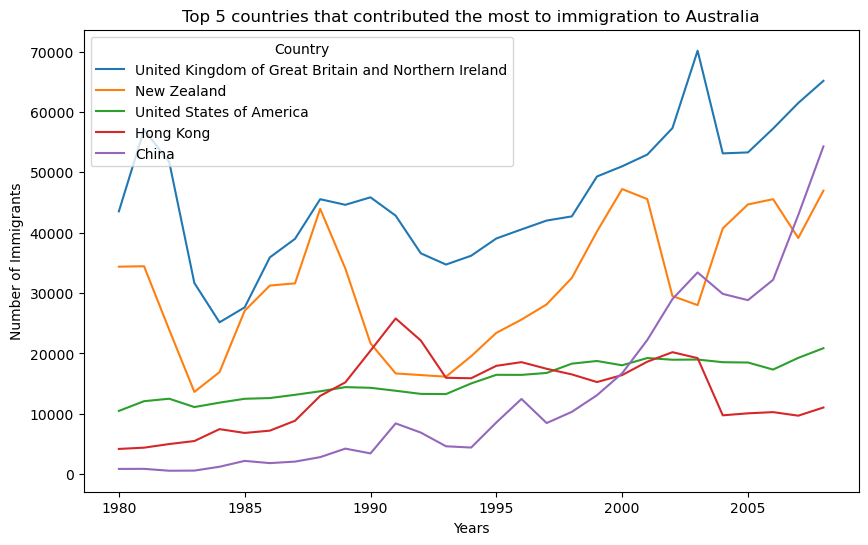

In [28]:
# Compare throughout the years
df_top5.plot(kind='line', figsize=(10, 6))
plt.title("Top 5 countries that contributed the most to immigration to Australia")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")
plt.show()

As we can see from the chart above, China is the country having the strongest increasing trend throughout the years, while Hong Kong is opposite. If we considered to the politics aspect, Hong Kong was handed back to China by UK in 1999, this is the reason while the number of Immigrants from Hong Kong began to shrink in 2000s.

## The frequency distribution of the number of new immigrants from all countries to Australia in 2008

Text(0, 0.5, 'Number of Countries')

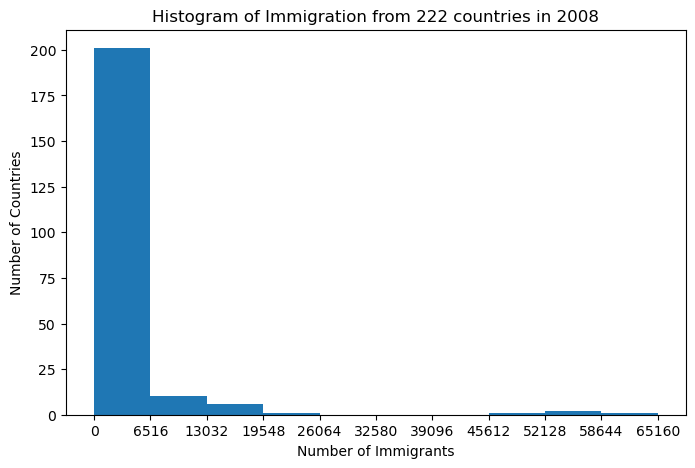

In [29]:
count, bin_edges = np.histogram(df_aus['2008'])
df_aus['2008'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)
plt.title('Histogram of Immigration from 222 countries in 2008')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

The range from 0 - 6516 is the most dominant

## The immigration distribution for top 3 countries that contributed the most to immigration to Australia for years 1980 - 2008

In [30]:
df_top3 = df_aus.sort_values('Total', ascending=False).head(3).transpose()
df_top3.drop(['Continent', 'Region', 'Total'], inplace=True, axis=0)
df_top3.rename(columns={"United Kingdom of Great Britain and Northern Ireland": "United Kingdom"}, inplace=True)
df_top3

Country,United Kingdom,New Zealand,United States of America
1980,43540,34370,10470
1981,57050,34440,12080
1982,51730,23920,12490
1983,31660,13620,11110
1984,25150,16900,11840
1985,27630,27070,12480
1986,35910,31240,12600
1987,38980,31610,13140
1988,45550,43960,13720
1989,44620,34060,14410


Text(0, 0.5, 'Number of Years')

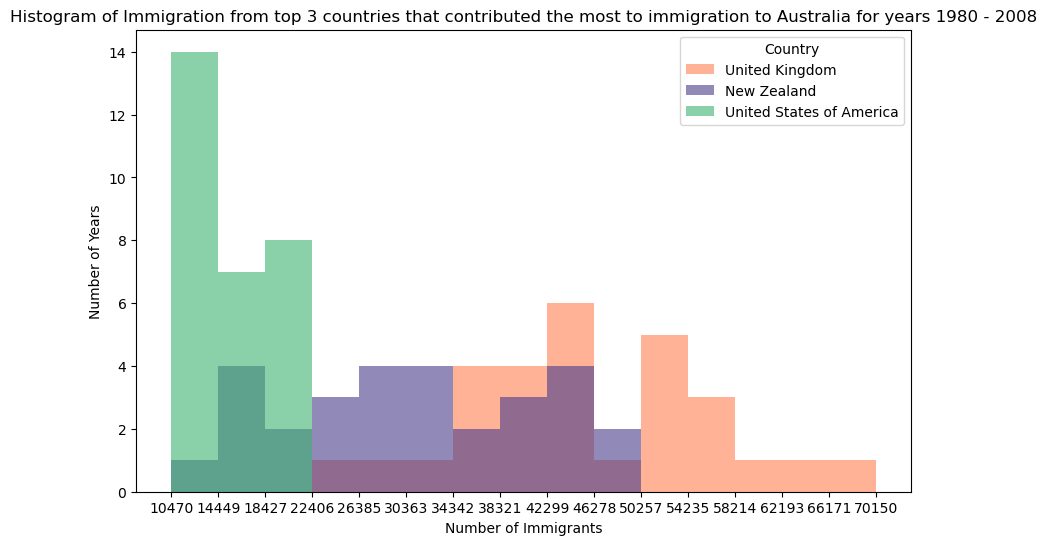

In [31]:
df_top3[df_top3.columns.to_list()] = df_top3[df_top3.columns.to_list()].astype(int)
count, bin_edges = np.histogram(df_top3, 15)
colors = ['coral', 'darkslateblue', 'mediumseagreen']
df_top3.plot(kind='hist', figsize=(10,6), xticks=bin_edges, bins=15, alpha=0.6, color=colors)
plt.title('Histogram of Immigration from top 3 countries that contributed the most to immigration to Australia for years 1980 - 2008')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

## Analyzing the effect of Argentina's economic crises

Text(17, 350, '1998–2002 great depression')

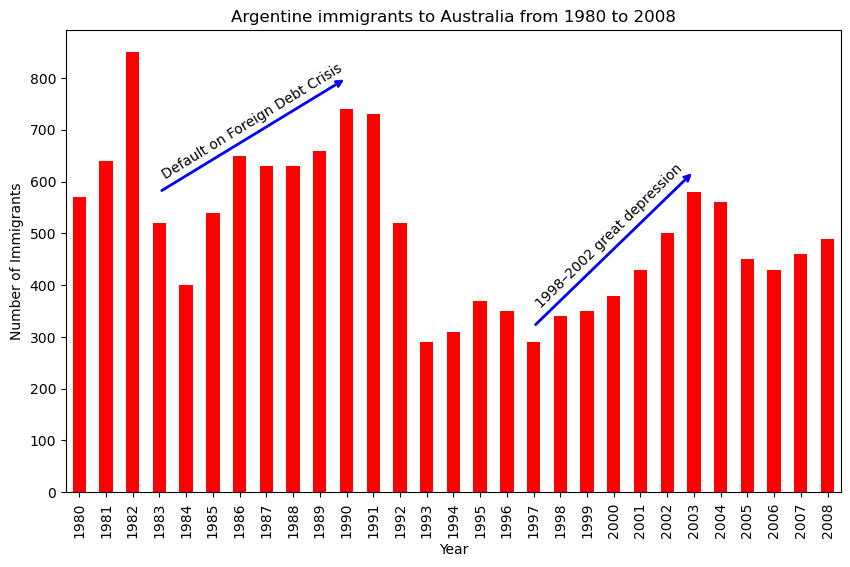

In [32]:
df_arg = df_aus.loc[['Argentina'], years].transpose()
df_arg.plot(kind='bar', figsize=(10,6), color='r')
plt.gca().get_legend().remove() # Remove legend as default
plt.title('Argentine immigrants to Australia from 1980 to 2008')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.annotate('',
             xy=(10, 800),
             xytext=(3, 580),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.annotate('',
             xy=(23, 620),
             xytext=(17, 320),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.annotate('Default on Foreign Debt Crisis',
             xy=(3, 600),
             rotation=31.5,
             va='bottom',
             ha='left')

plt.annotate('1998–2002 great depression',
             xy=(17, 350),
             rotation=44.5,
             va='bottom',
             ha='left')

## Data pertaining to top 15 countries

In [33]:
df_top15 = df_aus.sort_values('Total').tail(15)
indexes = df_top15.index.to_list()
indexes[0] = "United Kingdom"
indexes[3] = "Hong Kong"
df_top15.rename(index={"United Kingdom of Great Britain and Northern Ireland" : "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"}, inplace=True)
df_top15

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
Country,,,,,,,,,,,,,,,,,,,,,
Canada,Northern America,Northern America,2920,3770,3830,3170,3030,3390,3440,3480,...,5710,6050,6240,6430,6350,6520,6700,7020,7930,140860
Republic of Korea,Asia,Eastern Asia,390,620,1030,870,880,1180,1800,2310,...,5630,7420,8650,9640,10210,11670,13950,15390,17240,156680
Thailand,Asia,South-Eastern Asia,4730,5300,4230,6790,3530,3100,3280,4250,...,5070,6970,7690,7900,7630,8370,9990,11750,13350,162860
South Africa,Africa,Southern Africa,3890,4200,4160,3310,2310,3310,5640,5190,...,9180,10590,8850,9890,7090,7900,7970,8790,13450,170800
Philippines,Asia,South-Eastern Asia,3610,4050,4430,4510,4010,4700,5720,9870,...,4750,4650,5290,5460,7160,8070,10040,11160,13760,186270
Indonesia,Asia,South-Eastern Asia,5990,4400,3780,4330,4070,3880,4120,3830,...,13640,15390,13650,13840,8970,7960,8350,8370,9960,228250
Singapore,Asia,South-Eastern Asia,2850,3560,2950,2940,2910,2920,3250,4640,...,12080,15390,17310,16020,16340,17520,19350,16990,18080,264300
Japan,Asia,Eastern Asia,2240,2980,2930,3200,3250,3760,4130,4930,...,10930,21200,24810,19030,11900,10920,10370,10640,10230,266510
India,Asia,Southern Asia,1220,1560,1870,2090,2300,2510,2390,2900,...,10390,9380,9240,15080,18310,19920,27880,41920,58400,291500


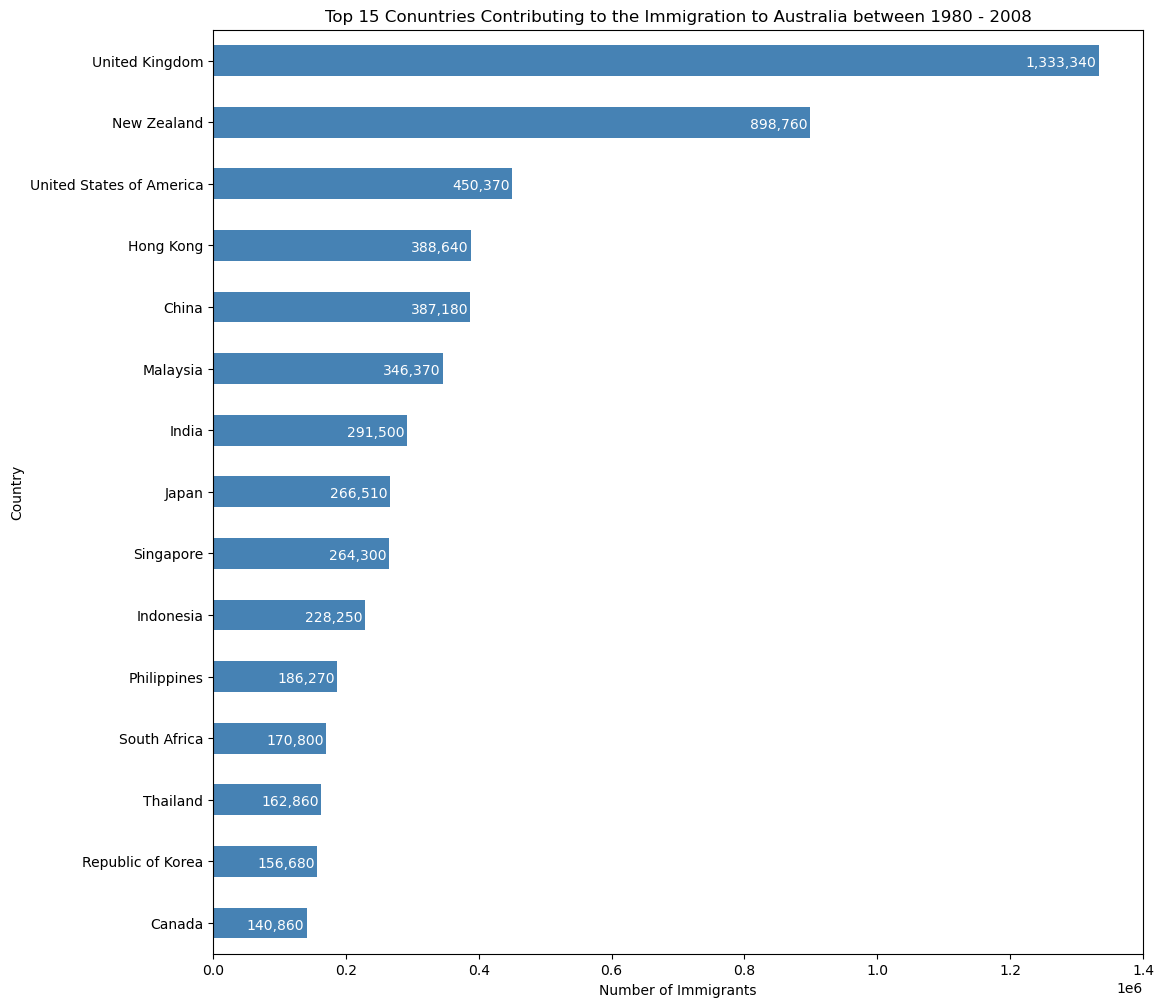

In [34]:
df_top15['Total'].plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.title('Top 15 Conuntries Contributing to the Immigration to Australia between 1980 - 2008')
plt.xlabel('Number of Immigrants')

# annotate value labels to each country
for index, value in enumerate(df_top15['Total']):
    label = format(int(value), ',') # format numbers with commas
    if value > 1000000:
        plt.annotate(label, xy=(value-110000, index - 0.1), color='white')
    else:
        plt.annotate(label, xy=(value-90000, index - 0.1), color='white')

## Explore the proportion of new immigrants by continents for the entire time period from 1980 to 2008

In [35]:
# Extract the data grouped by continents for the period from 1980 to 2008
df_continent = df_aus.groupby('Continent', axis=0).sum()
df_continent

C:\Users\pc\AppData\Local\Temp\ipykernel_13036\4269200568.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continent = df_aus.groupby('Continent', axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,6110,7040,7150,6290,5270,6370,9230,10430,9190,6580,...,15050,18450,17960,22600,20840,22150,22640,23800,29180,354440
Asia,45030,49250,46190,50930,55850,56090,61910,75460,87340,88650,...,134620,164010,184830,194800,166160,172550,202410,239900,299610,3463640
Europe,70710,90540,86100,55080,45030,50070,60210,66180,73930,70090,...,82870,88580,92960,106170,84260,84180,89310,96870,106090,2166780
Latin America and the Caribbean,2440,2230,2530,2410,4040,4810,4660,5420,5650,5460,...,2730,3170,3730,4170,4460,5510,7130,8910,10650,120350
Northern America,13410,15870,16350,14310,14890,15890,16060,16650,17530,18660,...,23760,25320,25230,25450,24930,25030,24070,26310,28840,592060
Oceania,42530,43320,32870,21330,24480,34710,39240,40960,53860,43250,...,53030,51790,35120,33500,48690,52250,54330,46550,56630,1126180


(-1.1096750792490984,
 1.3032173507587632,
 -1.104949278649038,
 1.203938261015429)

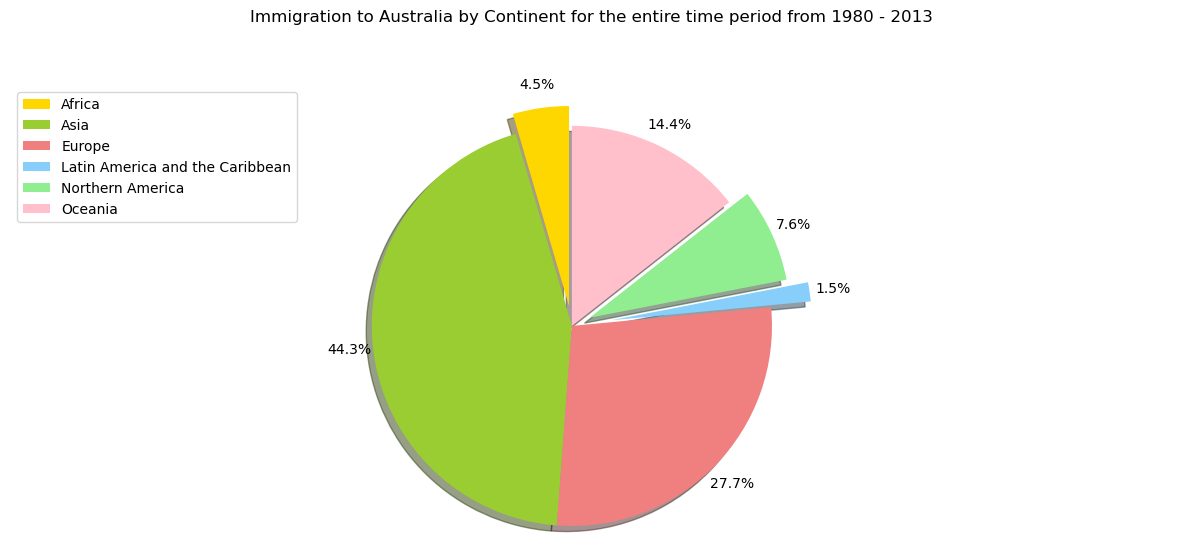

In [36]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0]
df_continent['Total'].plot(kind='pie', 
                      figsize=(15,6),
                      autopct='%1.1f%%',
                      startangle=90,
                      colors=color_list,
                      pctdistance=1.12,
                      shadow=True,
                      labels=None,
                      explode=explode_list
                      )
plt.title("Immigration to Australia by Continent for the entire time period from 1980 - 2013", y=1.12)
plt.ylabel('')
plt.legend(labels=df_continent.index, loc='upper left')
plt.axis('equal')

As the chart showed, Asia and Europe are two continents contributing to the largest proportion number of Immigrants to Australia

Check for the proportion of the most updated year - 2008

(-1.1041689203578164,
 1.1875548795568627,
 -1.104925062854594,
 1.2034391191396174)

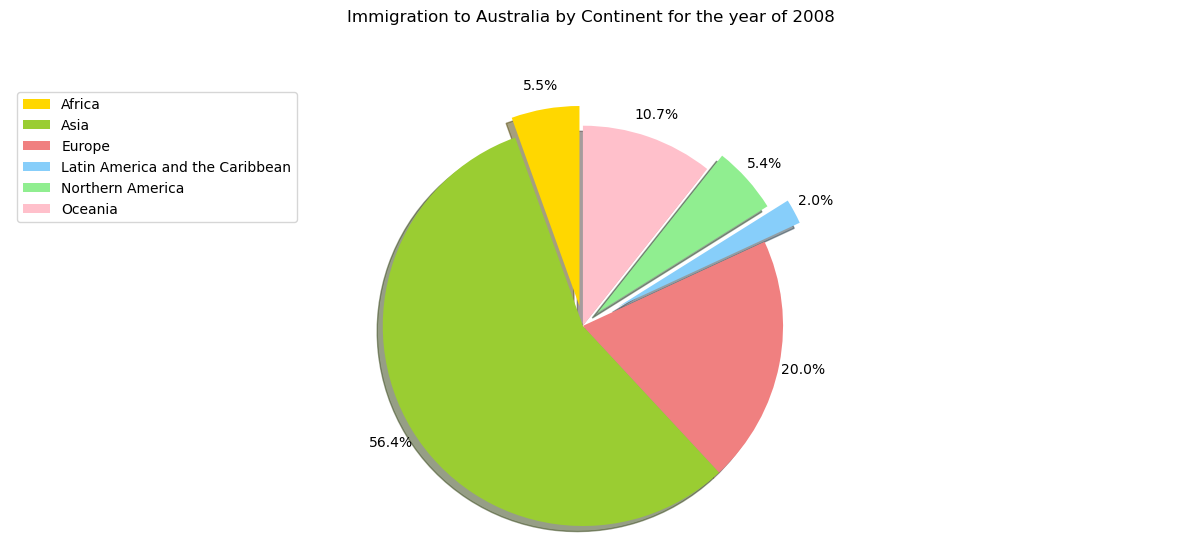

In [37]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.0, 0.0, 0.2, 0.1, 0.0]
df_continent['2008'].plot(kind='pie', 
                      figsize=(15,6),
                      autopct='%1.1f%%',
                      startangle=90,
                      colors=color_list,
                      pctdistance=1.12,
                      shadow=True,
                      labels=None,
                      explode=explode_list
                      )
plt.title("Immigration to Australia by Continent for the year of 2008", y=1.12)
plt.ylabel('')
plt.legend(labels=df_continent.index, loc='upper left')
plt.axis('equal')

For the period of the year 2008, the rank of continents still doesn't change. However, we can see the decreasing proportion of Europe, Oceania and Northern America while those from Asia, Africa and Latin America and the Caribbean are increasing significantly.

## Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2008

In [38]:
df_CI = df_aus.loc[["China", "India"], years].transpose()
df_CI

Country,China,India
1980,860,1220
1981,870,1560
1982,560,1870
1983,580,2090
1984,1220,2300
1985,2190,2510
1986,1820,2390
1987,2070,2900
1988,2810,2990
1989,4220,2980


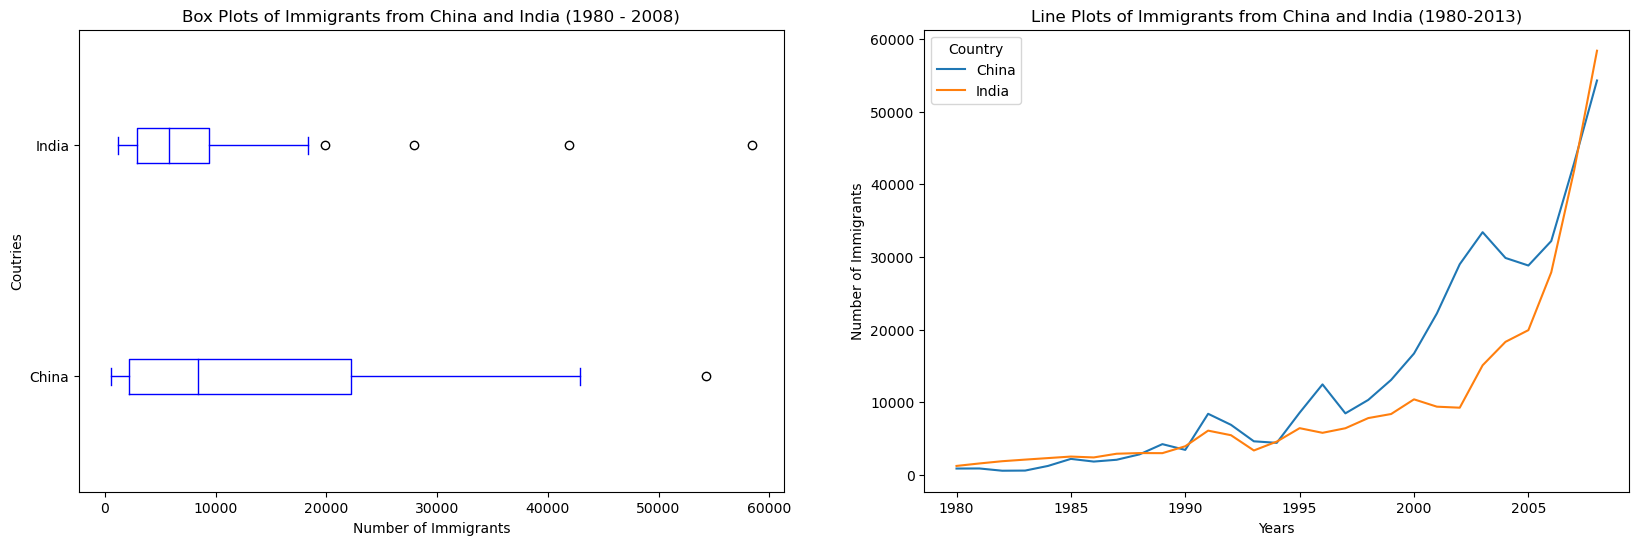

In [39]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Subplot 1
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0)
ax0.set_title("Box Plots of Immigrants from China and India (1980 - 2008)")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Coutries")

# Subplot 2
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1)
ax1.set_title("Line Plots of Immigrants from China and India (1980-2013)")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of Immigrants")

plt.show()

In [40]:
df_CI.describe()

Country,China,India
count,29.000000,29.000000
mean,13351.034483,10051.724138
std,14514.056326,12917.531019
min,560.000000,1220.000000
25%,2190.000000,2900.000000
50%,8400.000000,5780.000000
75%,22220.000000,9380.000000
max,54300.000000,58400.000000


We can observe that, China's median is bigger than India's (8,400 compare to ~5,800) and China's immigrant population range is also more spread out than India's. The maximum population from India for any year (54,300) is a little bit lower than the maximum population from China (58,400).

## Visualizing the trend of total immigration to Australia for the years 1980 - 2008

Text(0, 0.5, 'Number of Immigrants')

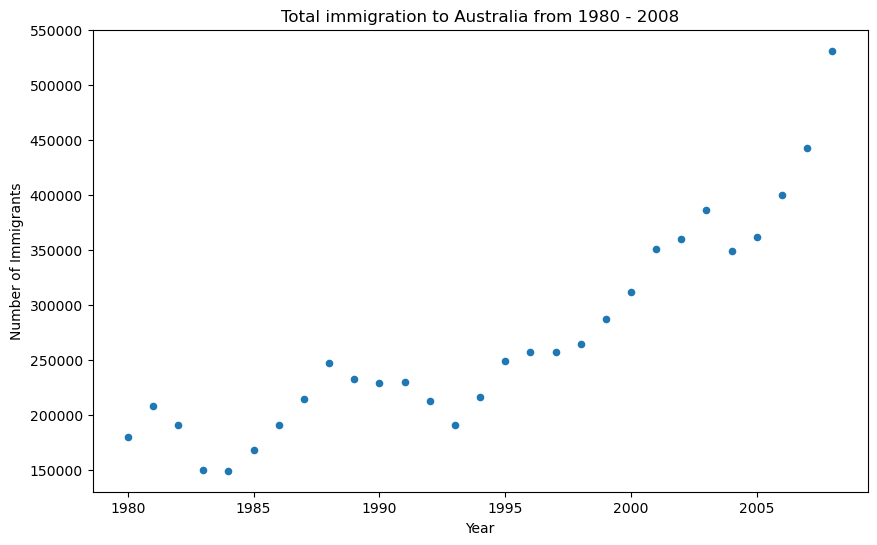

In [57]:
df_tot = pd.DataFrame(df_aus[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['Year', 'Total']
df_tot.plot(kind='scatter', x='Year', y='Total', figsize=(10, 6))
plt.title("Total immigration to Australia from 1980 - 2008")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

We can see from above chart that the immigration population of Australia is increasing strongly throughout the years especially since 1994. The above chart show the curve shape. Therefore we will buil a polynomial regression model to predict the future number of immigrants to Australia

In [61]:
x = df_tot['Year']
y = df_tot['Total']
fit = np.polyfit(x, y, deg=2)
p = np.poly1d(fit)
print(p)

     2
480 x - 1.904e+06 x + 1.889e+09


Text(1995, 200000, 'y = 480x^2 + -1904239x + 1888898614')

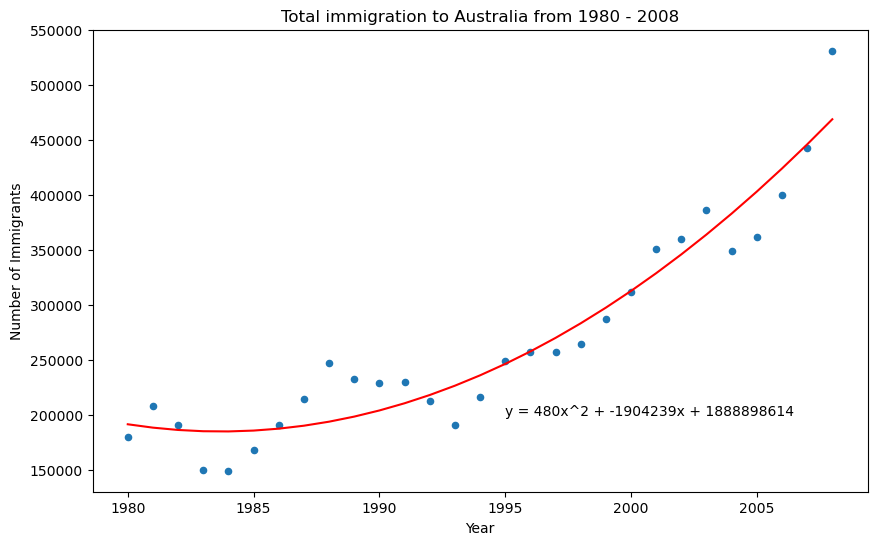

In [64]:
# Plot the regression line on the scatter plot
df_tot.plot(kind='scatter', x='Year', y='Total', figsize=(10, 6))
plt.title("Total immigration to Australia from 1980 - 2008")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.plot(x, fit[0] * pow(x, 2) + fit[1] * x + fit[2], color='r')
plt.annotate("y = {0:.0f}x^2 + {1:.0f}x + {2:.0f}".format(fit[0], fit[1], fit[2]), xy=(1995, 200000))

Let's evaluate the reliability of above model by calculate the R^2 score

In [65]:
# import r2_score function from the module metrics of sklearn library
import sklearn
from sklearn.metrics import r2_score

In [66]:
# Calculate the value of R squared
r_squared = r2_score(y, p(x))
print("The R-squared value is {}".format(r_squared))

The R-squared value is 0.9188807221430324


We can say that ~91.89 % of the valuation of **Year** is explained by this polynomial fit. That is a very high and this is considered as a reliable model for using predict the number of Immigrants to Australia in the future.

## Create a waffle chart showing Malaysia, Thailand and Vietnam proportion of total immigrants to Australia for all periods 

In [102]:
# Create a new dataframe of Vietnam, Thailand, and Indonesia
import matplotlib.patches as mpatches
df_ivt = df_aus.loc[['Indonesia', 'Viet Nam', 'Thailand'],:]
df_ivt

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,Asia,South-Eastern Asia,5990,4400,3780,4330,4070,3880,4120,3830,...,13640,15390,13650,13840,8970,7960,8350,8370,9960,228250
Viet Nam,Asia,South-Eastern Asia,130,70,200,920,2860,2140,3030,1680,...,3430,3800,4410,4840,4500,5110,6610,8310,11210,119060
Thailand,Asia,South-Eastern Asia,4730,5300,4230,6790,3530,3100,3280,4250,...,5070,6970,7690,7900,7630,8370,9990,11750,13350,162860


In [79]:
# Compute the proportion of each category with respect to total
total_values = df_ivt['Total'].sum()
category_proportions = pd.DataFrame({"Category proportion" : df_ivt['Total'] / total_values})
category_proportions

,Category proportion
Country,
Indonesia,0.447400
Viet Nam,0.233373
Thailand,0.319227


In [94]:
# Defining the overall size of the waffle chart
width = 40
height = 10
total_num_tiles = width * height
tiles_per_category = (total_num_tiles * category_proportions).round().astype(int)
tiles_per_category

,Category proportion
Country,
Indonesia,179
Viet Nam,93
Thailand,128


In [97]:
# initialize the waffle chart as an empty matrix
tiles_per_category = [179, 93, 128]
waffle_chart = np.zeros((height, width), dtype=np.uint)
category_index = 0
tile_index = 0
for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle_chart[row, col] = category_index
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

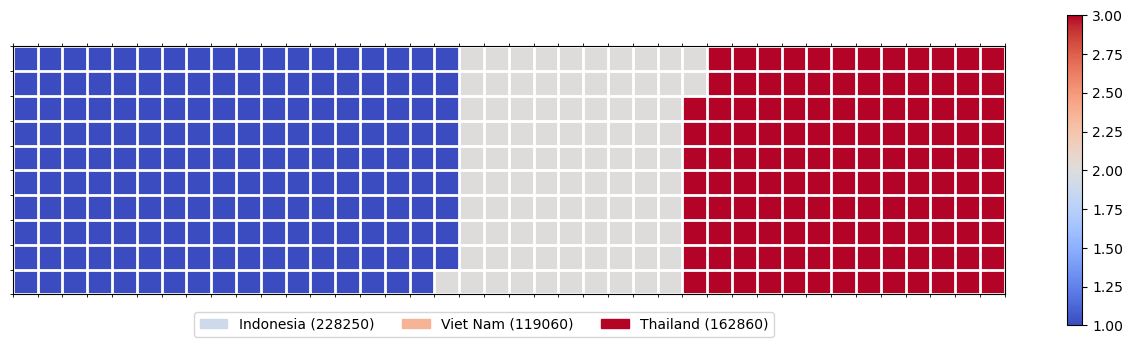

In [103]:
# Map the waffle chart matrix into a visual
fig = plt.figure()
# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
# get the axis
ax = plt.gca()
# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])
# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_ivt['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]
# create legend
legend_handles = []
for i, category in enumerate(df_ivt.index.values):
    label_str = category + ' (' + str(df_ivt['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_ivt.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
           )

## Choropleth map of the world depicting immigration from various countries to Australia 

In [104]:
# Download the GeoJSON file that defines the areas/boundaries of the state, county, or country
from urllib.request import urlopen
import json
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
data = urlopen(url2)
world_geo = json.loads(data.read())
world_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'name': 'Afghanistan'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[61.210817, 35.650072],
      [62.230651, 35.270664],
      [62.984662, 35.404041],
      [63.193538, 35.857166],
      [63.982896, 36.007957],
      [64.546479, 36.312073],
      [64.746105, 37.111818],
      [65.588948, 37.305217],
      [65.745631, 37.661164],
      [66.217385, 37.39379],
      [66.518607, 37.362784],
      [67.075782, 37.356144],
      [67.83, 37.144994],
      [68.135562, 37.023115],
      [68.859446, 37.344336],
      [69.196273, 37.151144],
      [69.518785, 37.608997],
      [70.116578, 37.588223],
      [70.270574, 37.735165],
      [70.376304, 38.138396],
      [70.806821, 38.486282],
      [71.348131, 38.258905],
      [71.239404, 37.953265],
      [71.541918, 37.905774],
      [71.448693, 37.065645],
      [71.844638, 36.738171],
      [72.193041, 36.948288],
      [72.63689, 37.047558],
      [73.

In [105]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [106]:
import folium

In [142]:
df_aus_map = df_aus.reset_index()
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df_aus_map,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_colors='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Australia',
    )
world_map

C:\Users\pc\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


[0, 266668, 533336, 800004, 1066672, 1333341]